# Introduction to Computer Vision: Plant Seedlings Classification

In [ ]:
!pip install keras-tuner

## Importing necessary libraries

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs

#add by Sarah
import sklearn.metrics as metrics

# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
# Mount Google drive to access the dataset
# Run the below code if you using google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/Colab Notebooks/Week14_TransferLearning/Project 5/images.npy')      # Complete the code to read the dataset

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Week14_TransferLearning/Project 5/Labels.csv')  # Complete the code to read the dataset

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)         # Complete the code to check the shape
print(labels.shape)         # Complete the code to check the shape

(4750, 128, 128, 3)
(4750, 1)


There are 4750 RGB images of shape 128 x 128 X 3, each image having 3 channels.

## Exploratory Data Analysis

### Plotting random images from each of the class

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

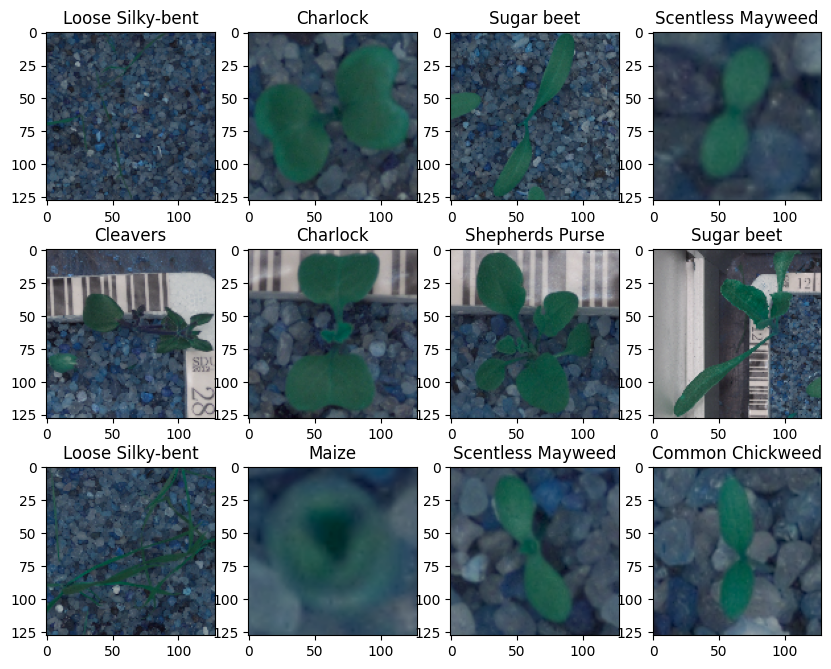

In [ ]:
plot_images(images, labels)   # Complete the code to input the images and labels to the function and plot the images with their labels

### Checking the distribution of the target variable

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

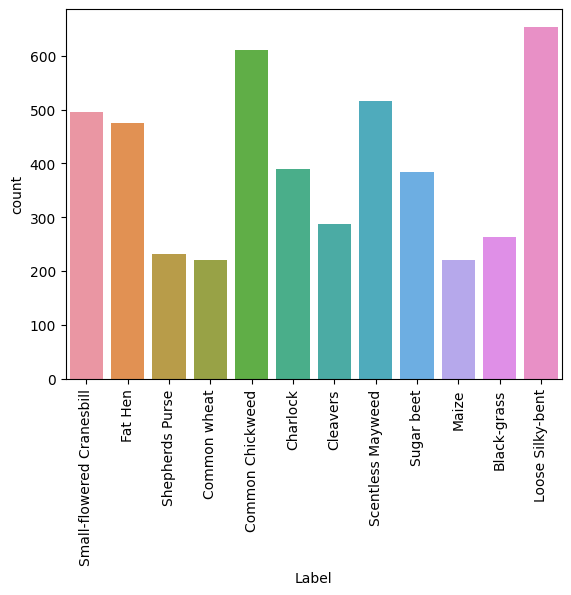

In [ ]:
sns.countplot(x=labels['Label'])            # Complete the code to check for data imbalance
plt.xticks(rotation='vertical')

* As you can see from the above plot, the dataset is not very balanced.
* There are 12 category, with the label 'Loose Silky-bent' has the most images and 'Maize' has the lease images

## Data Pre-Processing

### Converting the BGR images to RGB images.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)        # Complete the code to convert the images from BGR to RGB

### Resizing images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased=[]
height = 64                   # Complete the code to define the height as 64
width =  64                   # Complete the code to define the width as 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

**Image before resizing**

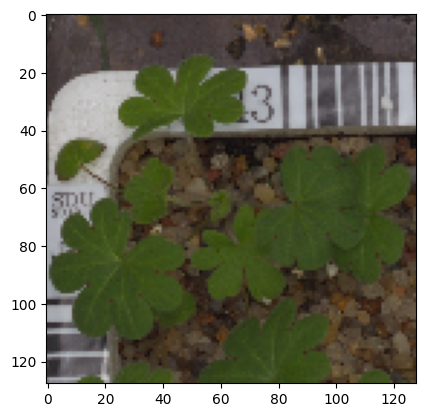

In [ ]:
plt.imshow(images[3])

**Image after resizing**

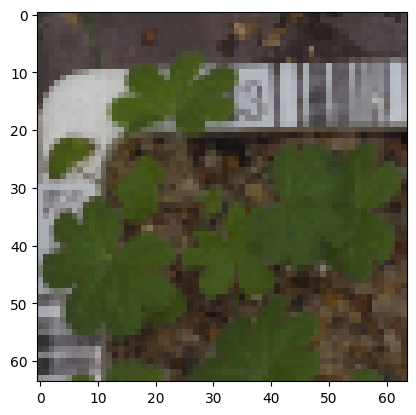

In [ ]:
plt.imshow(images_decreased[3])

### Data Preparation for Modeling


- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels, test_size=0.1, random_state=42,stratify=labels)   # Complete the code to split the data with test_size as 0.1
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42,stratify=y_temp)                       # Complete the code to split the data with test_size as 0.1

In [ ]:
# Complete the code to check the shape of train, validation and test data
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### Encoding the target labels

In [ ]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

enc = LabelBinarizer()                                       # Complete the code to intialize the labelBinarizer
y_train_encoded = enc.fit_transform(y_train)        # Complete the code to fit and transform y_train
y_val_encoded=enc.transform(y_val)                  # Complete the code to transform y_val
y_test_encoded=enc.transform(y_test)                # Complete the code to transform y_test

In [ ]:
y_train_encoded.shape,y_train.shape,y_test.shape    # Complete the code to check the shape of train, validation and test data

((3847, 12), (3847, 1), (475, 1))

### Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [ ]:
# Complete the code to normalize the image pixels of train, test and validation data
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

Let's create a CNN model sequentially, where we will be adding the layers one after another.

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow to be able to reproduce the same results every time we run the code.

## Actionable Insights and Business Recommendations

*

_____

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()


In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

In [ ]:
from kerastuner.tuners import RandomSearch
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


In [ ]:
def build_model(hp):
    model = Sequential()

    # Complete the code to add the first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
    # Input_shape denotes input image dimension of images
    model.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

    # Complete the code to add the max pooling to reduce the size of output of first conv layer
    model.add(MaxPooling2D((2, 2), padding = 'same'))

    # Complete the code to create two similar convolution and max-pooling layers activation = relu
    model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
    model.add(MaxPooling2D((2, 2), padding = 'same'))

    model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
    model.add(MaxPooling2D((2, 2), padding = 'same'))

    # Complete the code to flatten the output of the conv layer after max pooling to make it ready for creating dense connections
    model.add(Flatten())

    # Complete the code to add a fully connected dense layer with 16 neurons
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    # Complete the code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
    model.add(Dense(12, activation='softmax'))

    # Complete the code to use the Adam Optimizer
    opt=Adam()
    # Complete the code to Compile the model using suitable metric for loss fucntion
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Complete the code to generate the summary of the model

    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    max_consecutive_failed_trials=5,
    directory='my_dir',
    project_name='hparam_tuning',
    overwrite=True)



In [ ]:
tuner.search(X_train_normalized, y_train_encoded,
             epochs=10,
             validation_data=(X_val_normalized,y_val_encoded))


Trial 1 Complete [00h 01m 01s]
val_accuracy: 0.5334890981515249

Best val_accuracy So Far: 0.5334890981515249
Total elapsed time: 00h 01m 01s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters()[0]

In [ ]:
history = best_model.fit(X_train_normalized,y_train_encoded,
                                       shuffle=False,
                                       epochs=25,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction])

Epoch 1/25
121/121 [==============================] - 2s 12ms/step - loss: 2.4152 - accuracy: 0.1378 - val_loss: 2.4167 - val_accuracy: 0.1379 - lr: 6.2500e-05
Epoch 2/25
121/121 [==============================] - 1s 11ms/step - loss: 2.4152 - accuracy: 0.1378 - val_loss: 2.4167 - val_accuracy: 0.1379 - lr: 6.2500e-05
Epoch 3/25
121/121 [==============================] - 1s 11ms/step - loss: 2.4152 - accuracy: 0.1378 - val_loss: 2.4167 - val_accuracy: 0.1379 - lr: 6.2500e-05
Epoch 4/25
116/121 [===========================>..] - ETA: 0s - loss: 2.4154 - accuracy: 0.1385
Epoch 4: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
121/121 [==============================] - 1s 11ms/step - loss: 2.4152 - accuracy: 0.1378 - val_loss: 2.4167 - val_accuracy: 0.1379 - lr: 6.2500e-05
Epoch 5/25
121/121 [==============================] - 1s 11ms/step - loss: 2.4152 - accuracy: 0.1378 - val_loss: 2.4167 - val_accuracy: 0.1379 - lr: 3.1250e-05
Epoch 6/25
121/121 [===================

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = best_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)  # Complete the code to evaluate the model on test data

In [ ]:
y_pred=best_model.predict(X_test_normalized)

In [ ]:
y_pred

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(best_model.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(best_model.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(best_model.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])

## Complete the code to predict the test data using the final model selected
plt.figure(figsize=(2,2))
plt.imshow(X_test[59])
plt.show()
print('Predicted Label', enc.inverse_transform(best_model.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])

** VGG16

In [ ]:
# sTORING TRAIN AND TEST DATA PATH
train_dir = "/content/drive/MyDrive/Colab Notebooks/Week14_TransferLearning/Project 5/Training"
test_dir  = "/content/drive/MyDrive/Colab Notebooks/Week14_TransferLearning/Project 5/Testing"

# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(rescale=1. / 255.0,
                              horizontal_flip = True,
                              vertical_flip = False,
                              height_shift_range= 0.1,
                              width_shift_range=0.1,
                              rotation_range=20,
                              shear_range = 0.1,
                              zoom_range=0.1)
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

# Flowing training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

# Flowing validation images in batches of 20 using test_datagen generator
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

In [ ]:
# Complete the code to set the rotation_range to 20
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                             )


In [ ]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

#vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
# vgg_model.summary()
# Loading VGG16 model
model = VGG16(weights='imagenet')
# Summary of the whole model
model.summary()

In [ ]:
# Getting only the conv layers for transfer learning.
transfer_layer = model.get_layer('block5_pool')
vgg_model = Model(inputs=model.input, outputs=transfer_layer.output)

In [ ]:
vgg_model.summary()

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

In [ ]:
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

In [ ]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Added by Sarah
# new_model.add(BatchNormalization())
# end adding

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.2))
#new_model.add(Dropout(0.5))

from keras.regularizers import l2
new_model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
#new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

In [ ]:
testX, testY = test_generator.next()

In [ ]:
from keras import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# Epochs
#epochs = 30
# Batch size
#batch_size = 64

# Ensure that your batch size is suitable for your dataset size
#if X_train_normalized.shape[0] % batch_size != 0:
 #   print("Warning: Batch size does not evenly divide the training set size.")

#reduce_lr = ReduceLROnPlateau(moonitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)

#history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
#                                      batch_size=batch_size,
#                                       shuffle=False),
#                    epochs=epochs,
#                   steps_per_epoch=X_train_normalized.shape[0] // batch_size,
#                  validation_data=(X_val_normalized,y_val_encoded),
#                   verbose=1,callbacks=[reduce_lr])

#6 history_vgg1= new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
#                                      batch_size=batch_size,
#                                       seed=42,
#                                       shuffle=False),
#                    epochs=epochs,
#                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
#                    validation_data=(X_val_normalized,y_val_encoded),
#                    verbose=1)

## Fitting the VGG model
history_vgg16 = new_model.fit(train_generator,
                                  validation_data = (X_val_normalized,y_val_encoded),
                                  epochs=30,callbacks=[es, mc],use_multiprocessing=True)#

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

In [ ]:
y_pred=new_model.predict(X_test_normalized)

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()